In [1]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from keras import optimizers
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv(r'..\\data\\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X_raw = data.iloc[:, 0:-1]
y_raw = data.iloc[:, -1]

X_train_raw, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.3, random_state=0)

# over sampling
sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_sample(X_train_raw, y_train)

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.fit_transform(X_test)

In [5]:
#-------------------Build the Neural Network model-------------------
print('Building Neural Network model...')
adam = optimizers.adam(lr = 0.1, decay = 0.00001)

model = Sequential()

model.add(Dense(64, input_dim=X_train_normalized.shape[1],
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(10),
                activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(32,
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(10),
                activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(16,
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(10),
                activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(4,
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(10),
                activation="relu"))
model.add(Dropout(0.1))

model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam')
callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=50)]

history = model.fit(X_train_normalized, y_train, validation_split=0.20, epochs=200, batch_size=1024, callbacks=callbacks)

Building Neural Network model...
Train on 318430 samples, validate on 79608 samples
Epoch 1/200
318430/318430 [==============================] - 5s 15us/step - loss: 0.4078 - val_loss: 0.6390
Epoch 2/200
318430/318430 [==============================] - 4s 13us/step - loss: 0.2504 - val_loss: 0.5608
Epoch 3/200
318430/318430 [==============================] - 4s 13us/step - loss: 0.2100 - val_loss: 0.4285
Epoch 4/200
318430/318430 [==============================] - 4s 12us/step - loss: 0.1797 - val_loss: 0.3529
Epoch 5/200
318430/318430 [==============================] - 3s 11us/step - loss: 0.1582 - val_loss: 0.3174
Epoch 6/200
318430/318430 [==============================] - 4s 12us/step - loss: 0.1408 - val_loss: 0.2673
Epoch 7/200
318430/318430 [==============================] - 5s 14us/step - loss: 0.1233 - val_loss: 0.2184
Epoch 8/200
318430/318430 [==============================] - 4s 12us/step - loss: 0.1117 - val_loss: 0.2196
Epoch 9/200
318430/318430 [=========================

Epoch 76/200
318430/318430 [==============================] - 3s 10us/step - loss: 0.0386 - val_loss: 0.0358
Epoch 77/200
318430/318430 [==============================] - 3s 9us/step - loss: 0.0359 - val_loss: 0.0370
Epoch 78/200
318430/318430 [==============================] - 3s 9us/step - loss: 0.0360 - val_loss: 0.0527
Epoch 79/200
318430/318430 [==============================] - 3s 8us/step - loss: 0.0387 - val_loss: 0.0379
Epoch 80/200
318430/318430 [==============================] - 3s 9us/step - loss: 0.0378 - val_loss: 0.0345
Epoch 81/200
318430/318430 [==============================] - 3s 9us/step - loss: 0.0361 - val_loss: 0.0333
Epoch 82/200
318430/318430 [==============================] - 3s 9us/step - loss: 0.0343 - val_loss: 0.0248
Epoch 83/200
318430/318430 [==============================] - 3s 9us/step - loss: 0.0360 - val_loss: 0.0295
Epoch 84/200
318430/318430 [==============================] - 3s 9us/step - loss: 0.0376 - val_loss: 0.0202
Epoch 85/200
318430/318430 

Epoch 151/200
318430/318430 [==============================] - 3s 10us/step - loss: 0.0320 - val_loss: 0.0322
Epoch 152/200
318430/318430 [==============================] - 3s 10us/step - loss: 0.0366 - val_loss: 0.0586
Epoch 153/200
318430/318430 [==============================] - 3s 10us/step - loss: 0.0328 - val_loss: 0.0213
Epoch 154/200
318430/318430 [==============================] - 3s 10us/step - loss: 0.0319 - val_loss: 0.0125
Epoch 155/200
318430/318430 [==============================] - 3s 9us/step - loss: 0.0334 - val_loss: 0.0259
Epoch 156/200
318430/318430 [==============================] - 3s 10us/step - loss: 0.0328 - val_loss: 0.0261
Epoch 157/200
318430/318430 [==============================] - 3s 10us/step - loss: 0.0329 - val_loss: 0.0151
Epoch 158/200
318430/318430 [==============================] - 3s 9us/step - loss: 0.0351 - val_loss: 0.0398
Epoch 159/200
318430/318430 [==============================] - 3s 10us/step - loss: 0.0349 - val_loss: 0.0167
Epoch 160/20

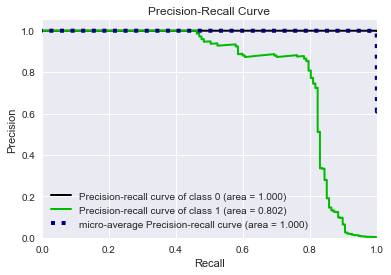

In [8]:
y_hat = model.predict_proba(X_test_normalized)

skplt.metrics.plot_precision_recall_curve(y_test, np.concatenate([1-y_hat, y_hat], axis = 1))
plt.show()

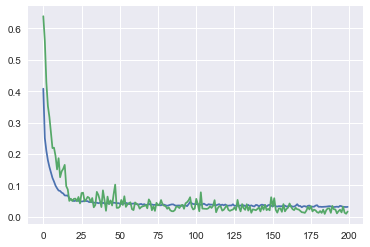

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])